### 2373, Андреев Никита
#### [Этот набор данных](https://www.kaggle.com/datasets/jeleeladekunlefijabi/ship-fuel-consumption-and-co2-emissions-analysis/data) содержит подробный обзор потребления топлива и выбросов CO2 для различных типов судов, работающих в нигерийских водных путях. Он включает данные о типах судов, маршрутах, эффективности двигателей, потреблении топлива, месяцах и выбросах, что делает его пригодным для исследований воздействия на окружающую среду, оптимизации морских операций и прогнозного моделирования. В этом проекте анализируется потребление топлива и выбросы CO2 различных типов судов, работающих в нигерийских водных путях.
*Источник данных: синтетический датасет, созданный для образовательных и аналитических целей.*

#### Описание набора данных:

Набор признаков (6 категориальных, 4 числовых), используемый в этом проекте, содержит следующие столбцы:
- Тип судна: делит суда на четыре основных типа: рыболовный траулер, судно для обслуживания нефтяных скважин, судно для серфинга и танкерное судно.
- Расход топлива (литры): общее количество топлива, потребляемое каждым типом судна во время эксплуатации.
- Выбросы CO2 (кг): количество выбрасываемого углекислого газа на основе потребления топлива.
- Другие переменные: вспомогательные данные, используемые для исследовательского анализа.

Этот набор данных был создан для моделирования реалистичных морских операций в Нигерии с учетом распространенных типов судов, моделей использования топлива и выбросов.

|Признак|Описание признака|
|-------|-----------------|
|ship_id| Обозначение судна|
|ship_type| Делит судна на 4 основных категории (Fishing Trawler, Oil Service Boat, Surfer Boat, and Tanker Ship)|
|route_id| Маршрут, пройденный судном|
|month| Месяц, когда была произведена запись|
|distance| Величина пройденного пути, в км|
|fuel_type| Тип топлива (HFO, Diesel)|
|fuel_consumption| Общее количество топлива, потребляемое каждым типом судна во время эксплуатации, в л|
|CO2_emissions| Количество выбрасываемого углекислого газа на основе потребления топлива, в кг|
|weather_conditions| Погодные условия (Stormy, Moderate, Calm)|
|engine_efficiency| Эффективность двигателя судна, в %|

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ship_fuel_efficiency.csv")
df.head(n=15)

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61
5,NG001,Oil Service Boat,Port Harcourt-Lagos,June,85.93,Diesel,2342.13,6753.42,Stormy,72.82
6,NG001,Oil Service Boat,Warri-Bonny,July,85.67,HFO,2974.79,8498.16,Moderate,93.93
7,NG001,Oil Service Boat,Warri-Bonny,August,44.81,Diesel,1376.38,3509.56,Moderate,91.10
8,NG001,Oil Service Boat,Escravos-Lagos,September,116.44,Diesel,3661.75,9423.97,Calm,73.41
9,NG001,Oil Service Boat,Lagos-Apapa,October,99.73,HFO,2551.99,6416.66,Moderate,94.68


Заметим, что колонка "ship_id" не представляет никакого интереса, поэтому удалим её.

Проверим наличие пустых значений:

In [29]:
df = df.drop(columns='ship_id')
df.isna().sum()

ship_type             0
route_id              0
month                 0
distance              0
fuel_type             0
fuel_consumption      0
CO2_emissions         0
weather_conditions    0
engine_efficiency     0
dtype: int64

Видим, что пустые значения отсутствуют

Тогда построим гистограммы для числовых и категориальных признаков:

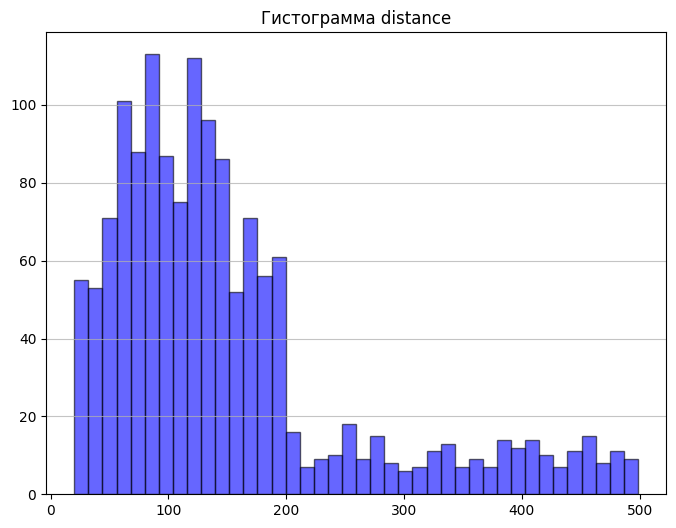

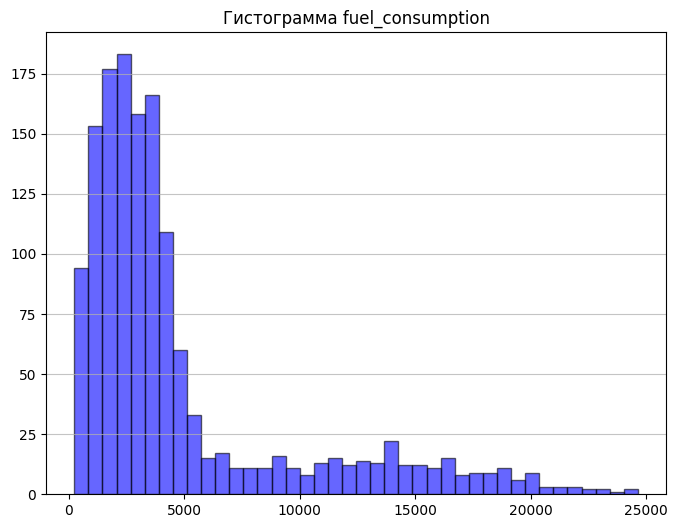

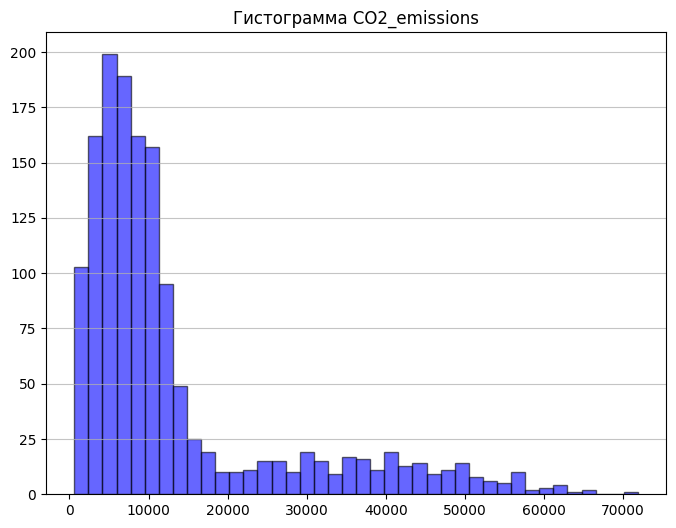

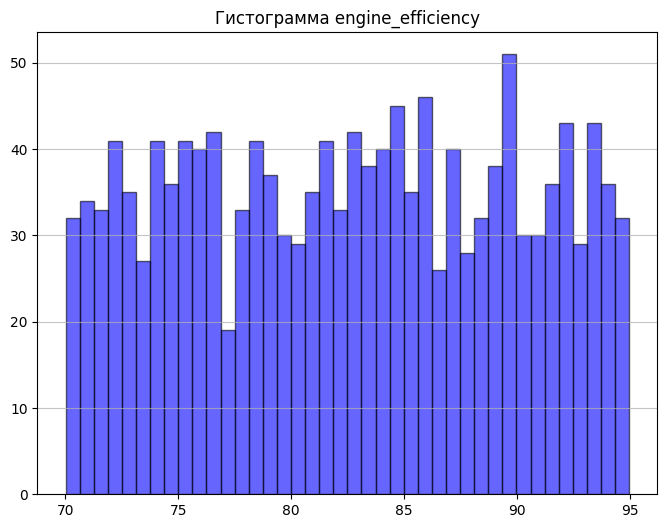

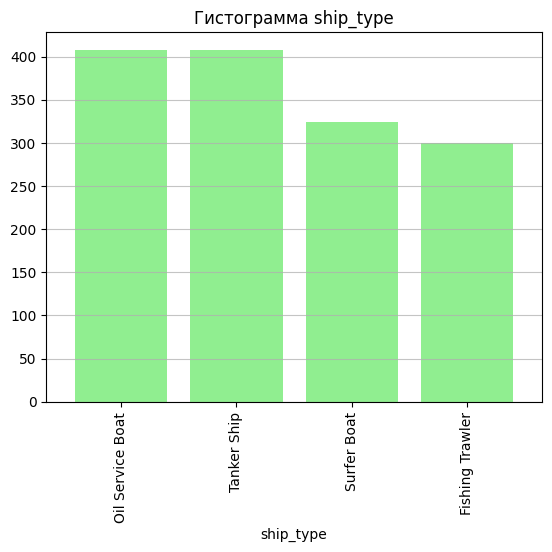

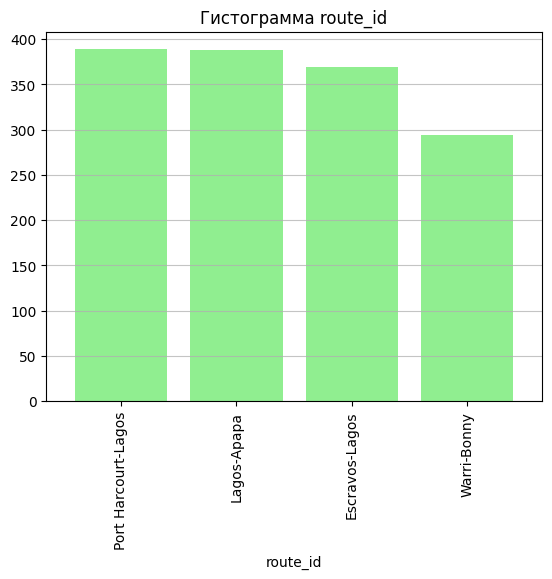

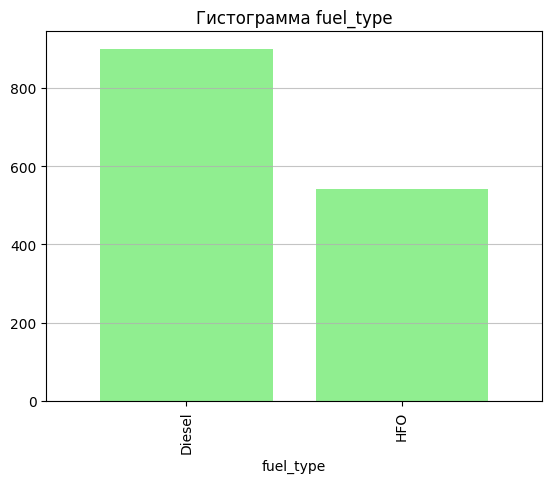

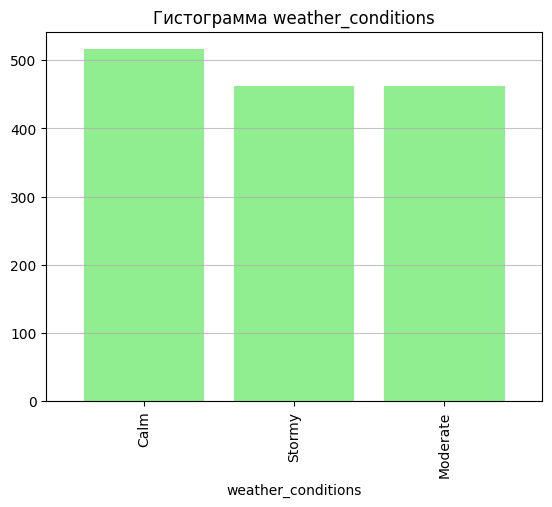

In [30]:
categorical_features = ['ship_type', 'route_id', 'fuel_type', 'weather_conditions']
numerical_features = [x for x in df.columns if (x not in categorical_features and x != 'month')]

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=40, alpha=0.6, color='blue', edgecolor='black')
    plt.title(f'Гистограмма {feature}')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    
for feature in categorical_features:
    df[feature].value_counts().plot(kind='bar', width=0.8, color='lightgreen')
    plt.title(f'Гистограмма {feature}')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

Для дальнейшей работы нужно закодировать категориальные числовые признаки числами.  
Описание работы функции:
1) Из категориального столбца выбираем уникальные значения.
2) Чтобы в дальнейшем иметь возможность однозначно определить, какая категория каким числом была закодирована, сортируем список уникальных значений.
3) Кодируем значение его индексом в списке.

In [31]:
def categorical_to_numerical_process(dataframe, column):
    
    def convert_to_index(value, uniq_values):
        return uniq_values.index(value)
        
    lists_uniq_values = sorted(list(set(dataframe[column])))
    dataframe[column] = dataframe[column].apply(lambda x: convert_to_index(x, lists_uniq_values))
    
categorical_features.append('month')
for feature in categorical_features:
    categorical_to_numerical_process(df, feature)
    
df.head(10)

,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,1,3,4,132.26,1,3779.77,10625.76,2,92.14
1,1,2,3,128.52,1,4461.44,12779.73,1,92.98
2,1,2,7,67.30,1,1867.73,5353.01,0,87.61
3,1,2,0,71.68,0,2393.51,6506.52,2,87.42
4,1,1,8,134.32,1,4267.19,11617.03,0,85.61
5,1,2,6,85.93,0,2342.13,6753.42,2,72.82
6,1,3,5,85.67,1,2974.79,8498.16,1,93.93
7,1,3,1,44.81,0,1376.38,3509.56,1,91.10
8,1,0,11,116.44,0,3661.75,9423.97,0,73.41
9,1,1,10,99.73,1,2551.99,6416.66,1,94.68


Найдём среднее значение и СКО.

Для этого воспользуемся функцией describe():

In [32]:
df.describe()

,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,1.583333,1.422222,5.500000,151.753354,0.375694,4844.246535,13365.454882,0.962500,82.582924
std,1.107809,1.079627,3.453252,108.472230,0.484470,4892.352813,13567.650118,0.823548,7.158289
min,0.000000,0.000000,0.000000,20.080000,0.000000,237.880000,615.680000,0.000000,70.010000
25%,1.000000,0.000000,2.750000,79.002500,0.000000,1837.962500,4991.485000,0.000000,76.255000
50%,2.000000,1.000000,5.500000,123.465000,0.000000,3060.880000,8423.255000,1.000000,82.775000
75%,3.000000,2.000000,8.250000,180.780000,1.000000,4870.675000,13447.120000,2.000000,88.862500
max,3.000000,3.000000,11.000000,498.550000,1.000000,24648.520000,71871.210000,2.000000,94.980000


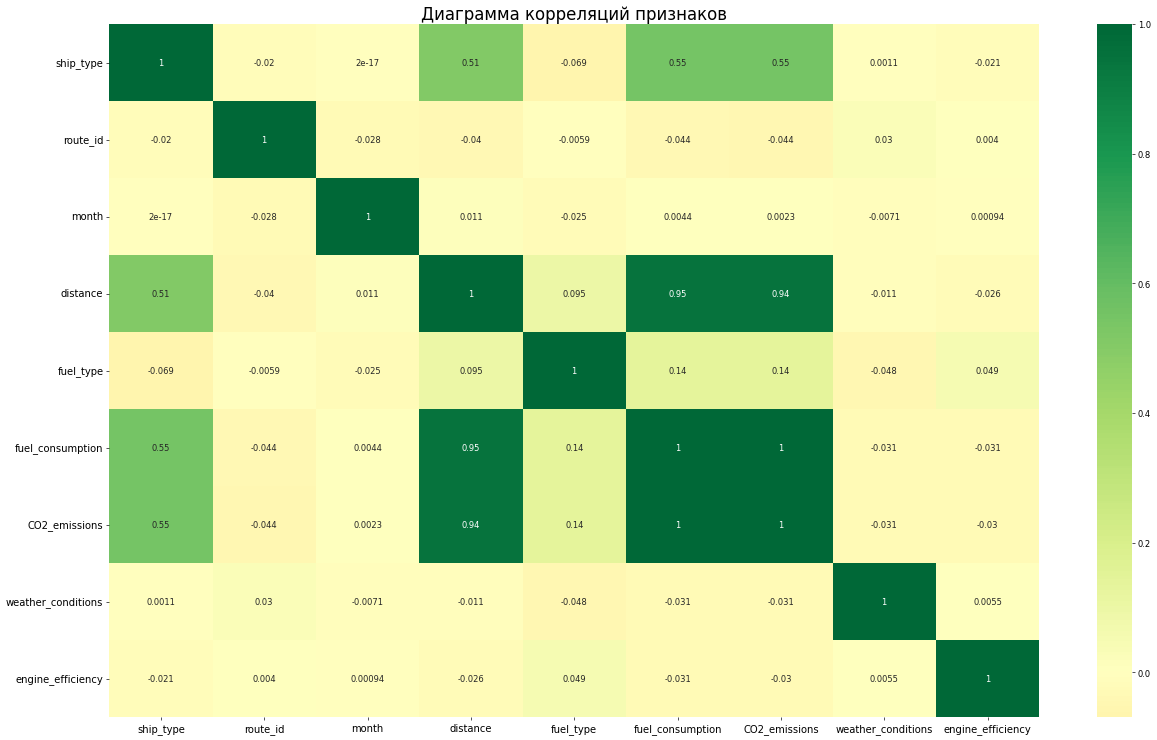

In [33]:
plt.figure(figsize=(25,15), dpi=60)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, center=0, annot=True, cmap='RdYlGn',)

plt.title('Диаграмма корреляций признаков', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

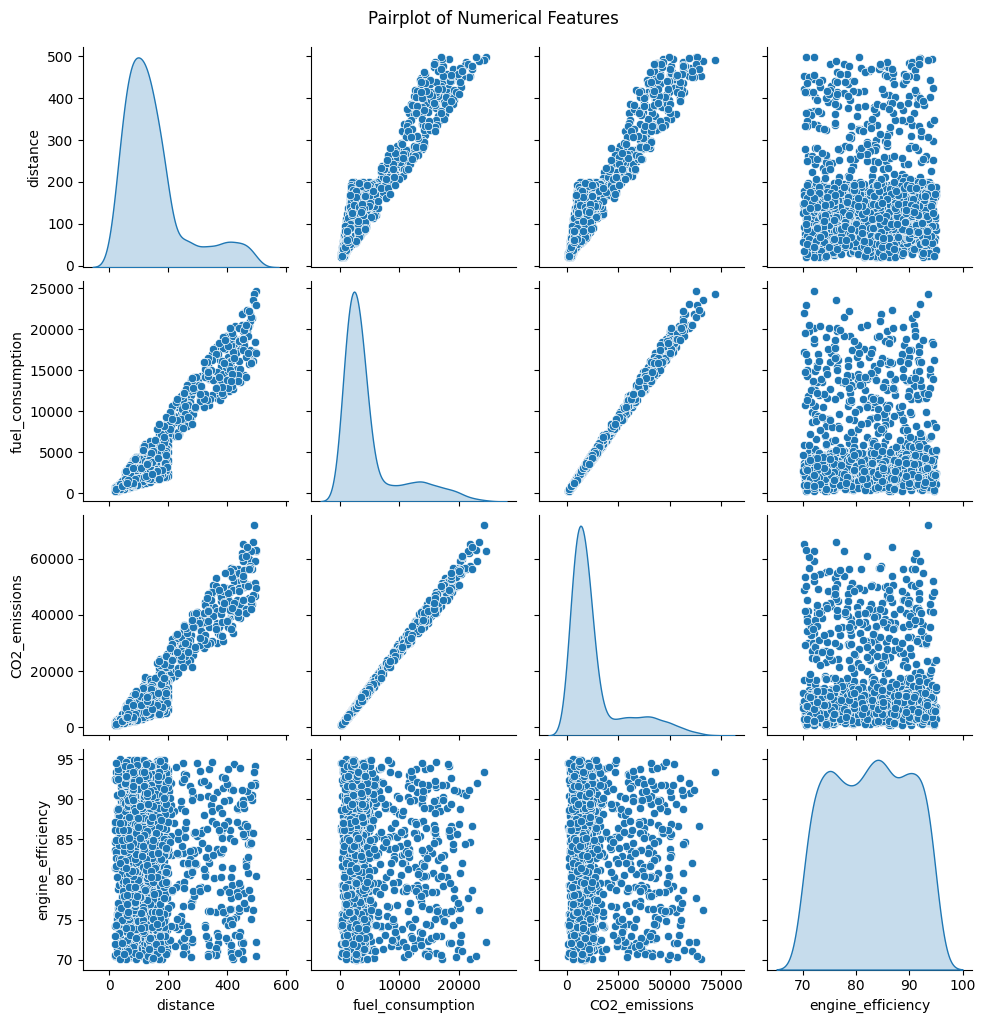

In [34]:
sns.pairplot(df[numerical_features], diag_kind="kde")
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

#### ✅ По матрице корреляций видно, что наиболее сильная положительная корреляция признаков наблюдается в парах CO2_emissions/fuel_consumption и distance/fuel_consumptions.
#### ❎ В парах distance/engine_effitiency и fuel_consumptions/engine_effitiency можно назвать слабой.

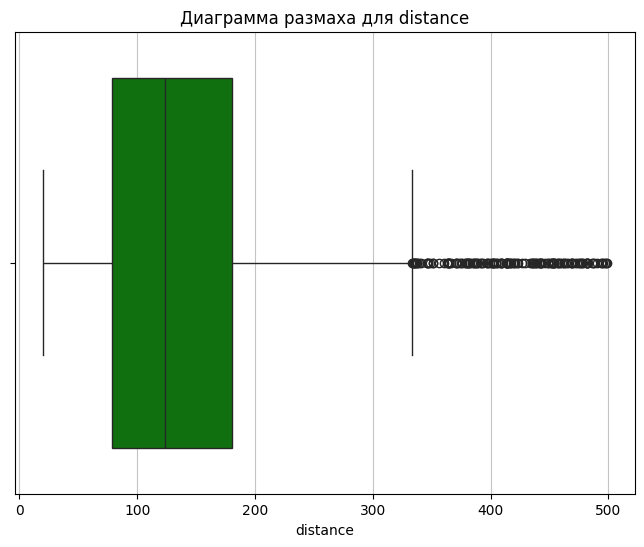

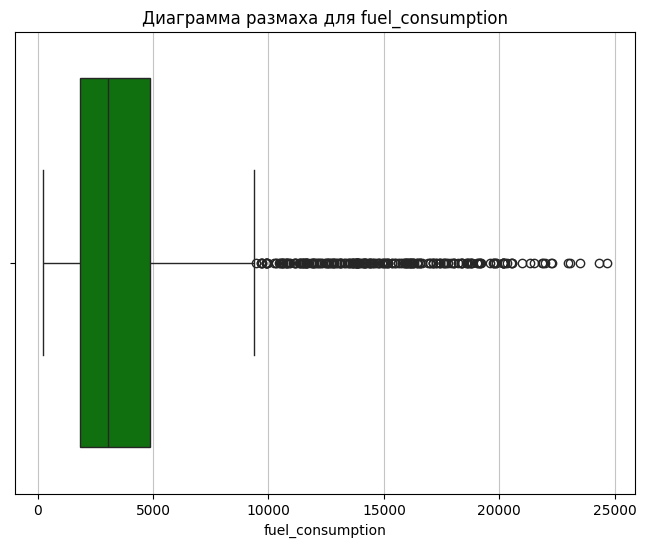

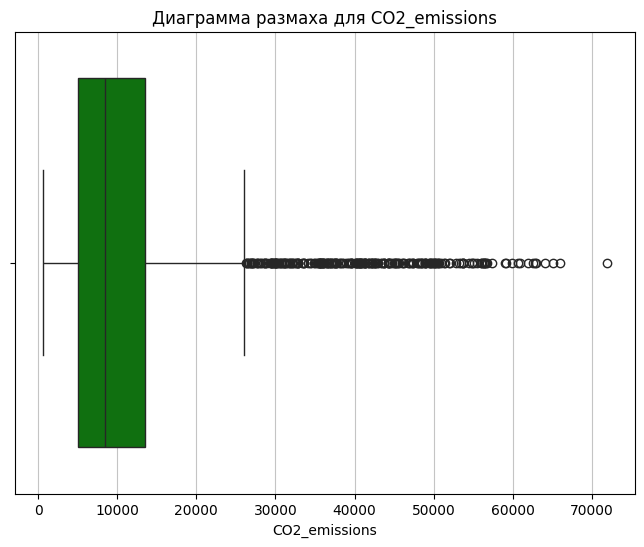

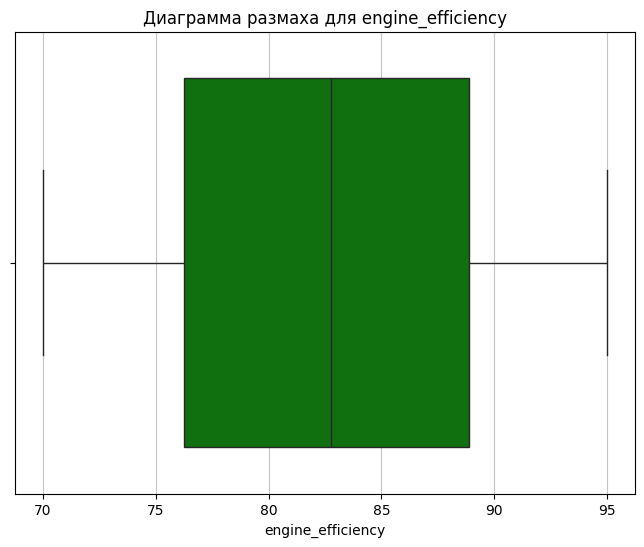

In [35]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], color='green')
    plt.title(f'Диаграмма размаха для {feature}')
    plt.xlabel(feature)
    plt.grid(axis='x', alpha=0.75)
    plt.show()